# EP1 - MAC0209

* Bruna Thalenberg - 8569211
* Eduardo Freire - 10262627
* Erica Cope -
* Guilherme Yambanis -
* Leonardo Rezende -
* Nathan Benedetto Proença -

## Introdução

O presente estudo tem o objetivo de estudar o comportamento dos movimentos uniforme e uniformemente variado por meio de experimentos e simulações algorítmicas e da comparação de dados experimentais e simulados. Foram utilizados os modelos clássicos que descrevem tais movimentos para as simulações, por meio de resolução analítica das equações.

## Métodos

### Experimentos
Para o experimento de Movimento Uniforme, o grupo aproveitou-se de uma calçada com lajotas uniformes, de 30 cm e rejunte de 4 cm. Essas marcações foram utilizadas para dimensionar os passos da pessoa realizando a travessia, que fez uso de um metrônomo a 80 bpm para realizar as passadas.

Para o experimento de Movimento Uniformemente Variado, utilizou-se de uma rampa uniforme e um skate, garantindo a aceleração constante da gravidade. Travessias foram realizadas nas posições em pé e sentada.

Com o auxílio de fita métrica, foram realizadas marcações a cada 5 metros. Cada travessia foi realizada três vezes, duas vezes com cronômetros pareados nas posições 10, 20 e 30 metros, e uma vez nas posições 5, 10, 15, 20, 25 e 30 metros. 

O tempo de travessia foi medido com o uso de cronômetros de aparelhos celulares e anotado manualmente em uma prancheta, para a posterior transposição para arquivos _csv_. Foi utilizado o acelerômetro de um celular Android, por meio do aplicativo _Physics Toolbox_, para obter dados adicionais a respeito da travessia. Esse celular foi operado pela pessoa que atravessava, com cinco segundos de período de estabilização inicial e final. 

### Simulações

A partir dos dados obtidos, foi calculada a velocidade média de cada travessia, a partir da soma do tempo total de cada iteração, dividida pela metragem total. Quando havia dois cronômetros pareados na posição $ d = 30 m$, foi utilizada a média entre ambos. A partir da velocidade média, foi calculado analiticamente o tempo decorrido do início até cada posição utilizando-se as equações da física newtoniana de cada movimento. Note que a velocidade inicial do MUV será sempre 0, uma vez que o movimento inicia-se do repouso. A posição inicial será também sempre 0, por convenção.


In [125]:
import csv
from matplotlib import pyplot as plt

def nextTmu(x, v):
    """ calcula quanto tempo foi necessário para atingir a posição x, dada a velocidade v
        
    Parâmetros:
    -----------
    x: float - Posição atual
    v: float - Velocidade do movimento
    
    Returns:
    --------
    t: float : tempo decorrido
    
    """
    if v == 0:
        return x
    return x/v

def nextTmuv(x, a):
    """ nextTmu implementa o método analítico para calcular o tempo decorrido dado uma aceleração média.
    Assume velocidade inicial 0, uma vez que o fenômeno modelado utiliza-se apenas da aceleração fornecida
    pela gravidade a partir de um corpo parado.
        
    Parâmetros:
    -----------
    x: float - Posição atual
    a: float - Aceleração média do movimento
    
    Returns:
    --------
    t: float : tempo pra realizar o percurso
    
    """
    if a == 0:
        return 0
    return math.sqrt(2*x/a)

## Verificação do programa

In [126]:
# testando a função que calcula o tempo para o MU
v = 2
r = []
s = [0, 1, 2, 3, 4, 5, 6]
r_esperado = [0, 0.5, 1, 1.5, 2, 2.5, 3]

for x in s:
    r.append(nextTmu(x, v))
    
if r == r_esperado:
    print("O programa funciona fornece o resultado esperado.")
    
# teste de corner case
x = nextTmu(0, 0)
if (x == 0):
    print("O programa funciona corretamente para caso extremo.")   



O programa funciona fornece o resultado esperado.
O programa funciona corretamente para caso extremo.


In [130]:
# testando a função que calcula o tempo para o MUV
a = 10
r = []
s = [0, 5, 20, 45]
r_esperado = [0, 1, 2, 3]

for x in s:
    r.append(nextTmuv(x, a))
    
if r == r_esperado:
    print("O programa funciona fornece o resultado esperado.")
    
# teste de corner case
x = nextTmuv(0, 0)
if (x == 0):
    print("O programa funciona corretamente para caso extremo.")   

O programa funciona fornece o resultado esperado.
O programa funciona corretamente para caso extremo.


## Dados

### Movimento Uniforme

Nos conjuntos de gráficos a seguir, exibimos os resultados das três travessias do movimento retilíneo uniforme, em três iterações cada: as duas primeiras, com cronômetros pareados nas posições 10, 20 e 30, e a terceira, com cronômetros nas posições 5, 10, 15, 20, 25, 30. Os dados experimentais são representados por pequenos círculos nas posições correspondentes às de cada cronômetro. No gráfico de cada travessia, apresentamos, também, na linha tracejada, o comportamento esperado do movimento uniforme, obtido de forma analítica.

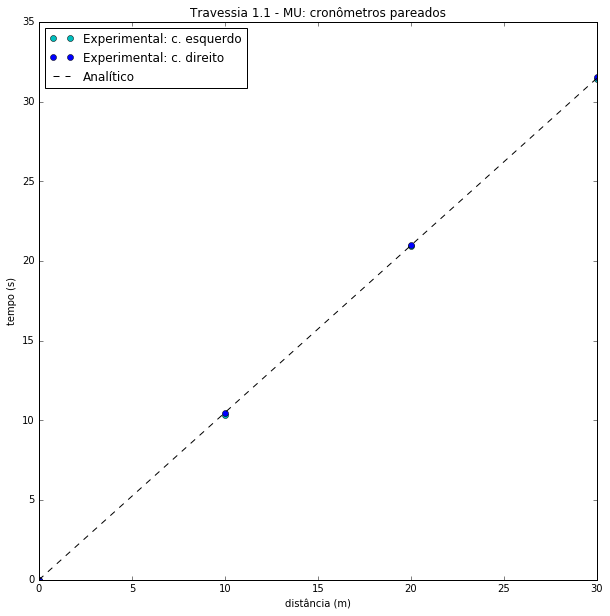

In [112]:
p1 = [0, 10, 20, 30]
p2 = [0, 5, 10, 15, 20, 25, 30]
t = []

with open ("tempo/tempo-gui.csv", "r") as mu1:
    rd = csv.reader(mu1, quoting=csv.QUOTE_NONNUMERIC)
    for line in rd:
        t.append([0] + line)
             
t_seq = (t[6][1:] + t[7])
t_seq.sort()

# Calculando analiticamente para a travessia 1.1
# Obtendo velocidade média a partir do tempo total (média dos 2 cronômetros) / espaço
v = 30 / ((t[0][3] + t[1][3]) / 2)
tAna = []
for x in p1:
    tAna.append(nextTmu(x, v))

plt.figure(figsize=(10,10))
plt.title("Travessia 1.1 - MU: cronômetros pareados")   
plt.xlabel('distância (m)')
plt.ylabel('tempo (s)')
plt.plot(p1, t[0], 'co', linestyle = "", label = "Experimental: c. esquerdo")
plt.plot(p1, t[1],'bo', linestyle = "", label = "Experimental: c. direito")
plt.plot(p1, tAna, 'k--', label = "Analítico")
plt.legend(loc = 0)

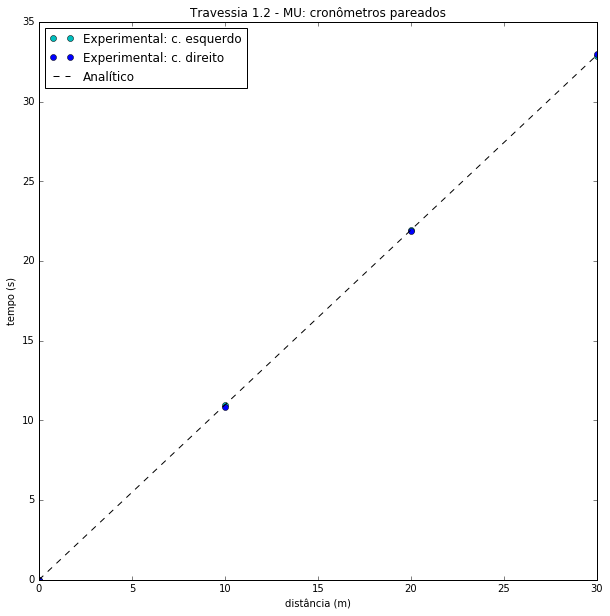

In [99]:
# Calculando analiticamente para a travessia 1.2
# Obtendo velocidade média a partir do tempo total (média dos 2 cronômetros) / espaço
v = 30 / ((t[3][3] + t[4][3]) / 2)
tAna = []
for x in p1:
    tAna.append(nextTmu(x, v))

plt.figure(figsize=(10,10))
plt.title("Travessia 1.2 - MU: cronômetros pareados")   
plt.xlabel('distância (m)')
plt.ylabel('tempo (s)')
plt.plot(p1, t[3], 'co', linestyle = "", label = "Experimental: c. esquerdo")
plt.plot(p1, t[4],'bo', linestyle = "", label = "Experimental: c. direito")
plt.plot(p1, tAna, 'k--', label = "Analítico")
plt.legend(loc = 0)

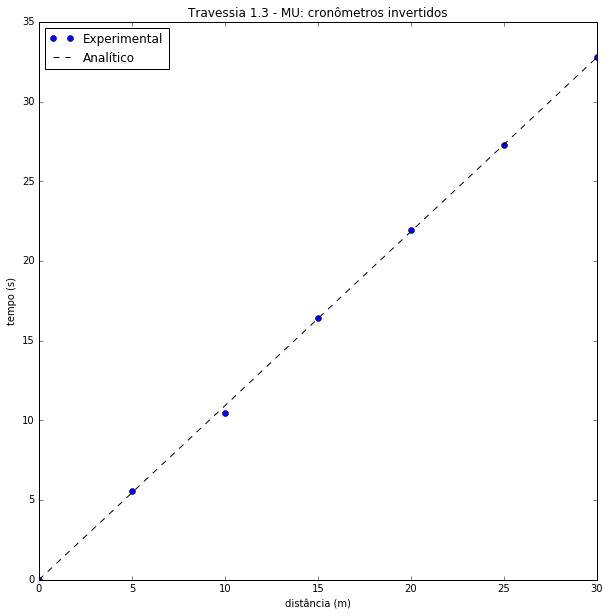

In [104]:
# Calculando analiticamente para a travessia 1.3
# Obtendo velocidade média a partir do tempo total (média dos 2 cronômetros) / espaço
v = 30 / t_seq[6]
tAna = []

for x in p2:
    tAna.append(nextTmu(x, v))

plt.figure(figsize=(10,10))
plt.title("Travessia 1.3 - MU: cronômetros invertidos")   
plt.xlabel('distância (m)')
plt.ylabel('tempo (s)')
plt.plot(p2, t_seq, 'bo', linestyle = "", label = "Experimental")
plt.plot(p2, tAna, 'k--', label = "Analítico")
plt.legend(loc = 0)

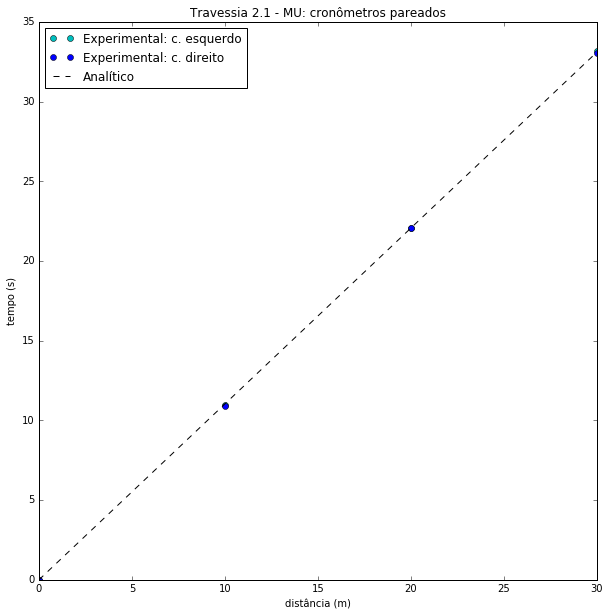

In [138]:
t = []

with open ("tempo/tempo-edu.csv", "r") as mu1:
    rd = csv.reader(mu1, quoting=csv.QUOTE_NONNUMERIC)
    for line in rd:
        t.append([0] + line)
             
t_seq = (t[6][1:] + t[7])
t_seq.sort()

# Calculando analiticamente para a travessia 2.1
# Obtendo velocidade média a partir do tempo total (média dos 2 cronômetros) / espaço
v = 30 / ((t[0][3] + t[1][3]) / 2)
tAna = []
for x in p1:
    tAna.append(nextTmu(x, v))

plt.figure(figsize=(10,10))
plt.title("Travessia 2.1 - MU: cronômetros pareados")   
plt.xlabel('distância (m)')
plt.ylabel('tempo (s)')
plt.plot(p1, t[0], 'co', linestyle = "", label = "Experimental: c. esquerdo")
plt.plot(p1, t[1],'bo', linestyle = "", label = "Experimental: c. direito")
plt.plot(p1, tAna, 'k--', label = "Analítico")
plt.legend(loc = 0)

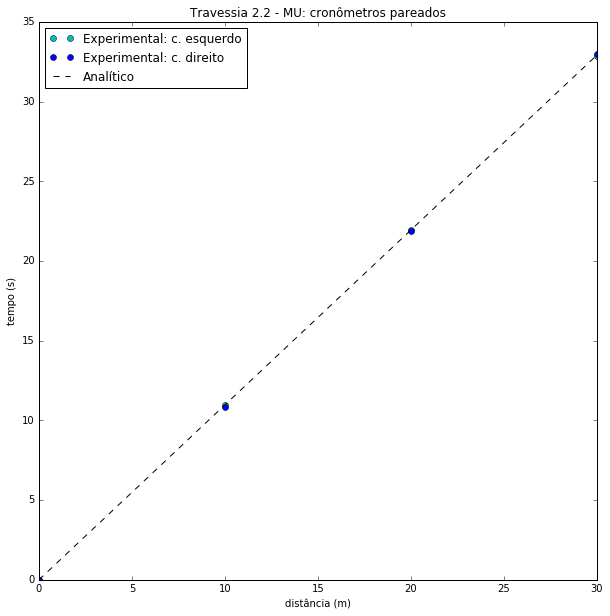

In [106]:
# Calculando analiticamente para a travessia 2.2
# Obtendo velocidade média a partir do tempo total (média dos 2 cronômetros) / espaço
v = 30 / ((t[3][3] + t[4][3]) / 2)
tAna = []
for x in p1:
    tAna.append(nextTmu(x, v))

plt.figure(figsize=(10,10))
plt.title("Travessia 2.2 - MU: cronômetros pareados")   
plt.xlabel('distância (m)')
plt.ylabel('tempo (s)')
plt.plot(p1, t[3], 'co', linestyle = "", label = "Experimental: c. esquerdo")
plt.plot(p1, t[4],'bo', linestyle = "", label = "Experimental: c. direito")
plt.plot(p1, tAna, 'k--', label = "Analítico")
plt.legend(loc = 0)

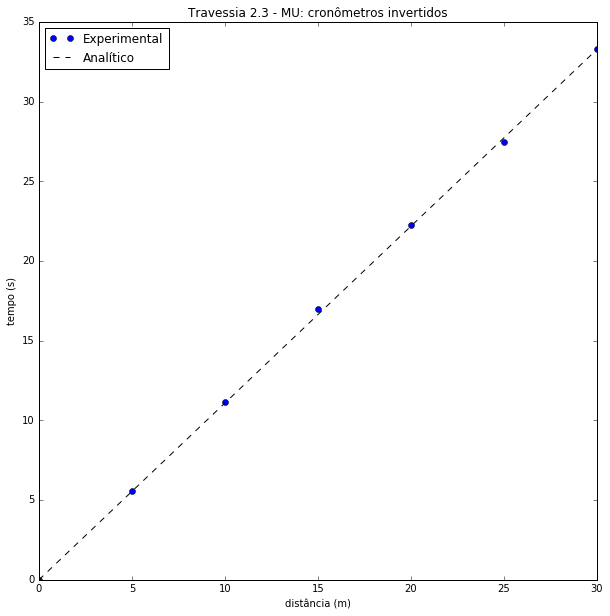

In [140]:
# Calculando analiticamente para a travessia 2.3
# Obtendo velocidade média a partir do tempo total (média dos 2 cronômetros) / espaço
v = 30 / t_seq[6]
tAna = []

for x in p2:
    tAna.append(nextTmu(x, v))

plt.figure(figsize=(10,10))
plt.title("Travessia 2.3 - MU: cronômetros invertidos")   
plt.xlabel('distância (m)')
plt.ylabel('tempo (s)')
plt.plot(p2, t_seq, 'bo', linestyle = "", label = "Experimental")
plt.plot(p2, tAna, 'k--', label = "Analítico")
plt.legend(loc = 0)

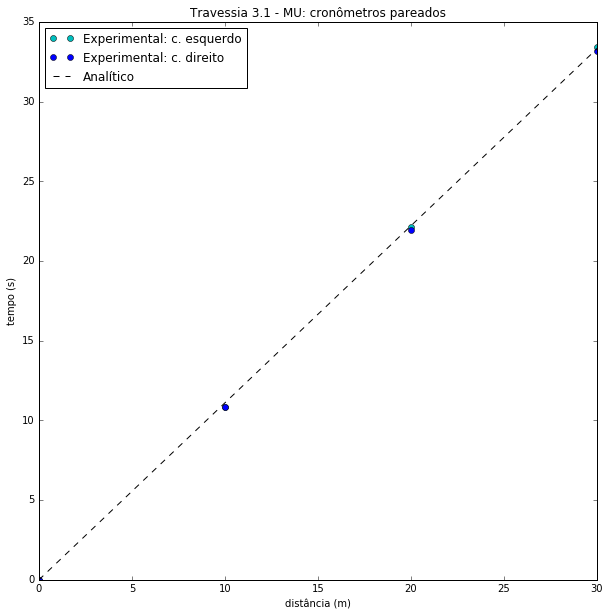

In [142]:
t = []

with open ("tempo/tempo-bruna.csv", "r") as mu1:
    rd = csv.reader(mu1, quoting=csv.QUOTE_NONNUMERIC)
    for line in rd:
        t.append([0] + line)
             
t_seq = (t[6][1:] + t[7])
t_seq.sort()

# Calculando analiticamente para a travessia 3.1
# Obtendo velocidade média a partir do tempo total (média dos 2 cronômetros) / espaço
v = 30 / ((t[0][3] + t[1][3]) / 2)
tAna = []
for x in p1:
    tAna.append(nextTmu(x, v))

plt.figure(figsize=(10,10))
plt.title("Travessia 3.1 - MU: cronômetros pareados")   
plt.xlabel('distância (m)')
plt.ylabel('tempo (s)')
plt.plot(p1, t[0], 'co', linestyle = "", label = "Experimental: c. esquerdo")
plt.plot(p1, t[1],'bo', linestyle = "", label = "Experimental: c. direito")
plt.plot(p1, tAna, 'k--', label = "Analítico")
plt.legend(loc = 0)

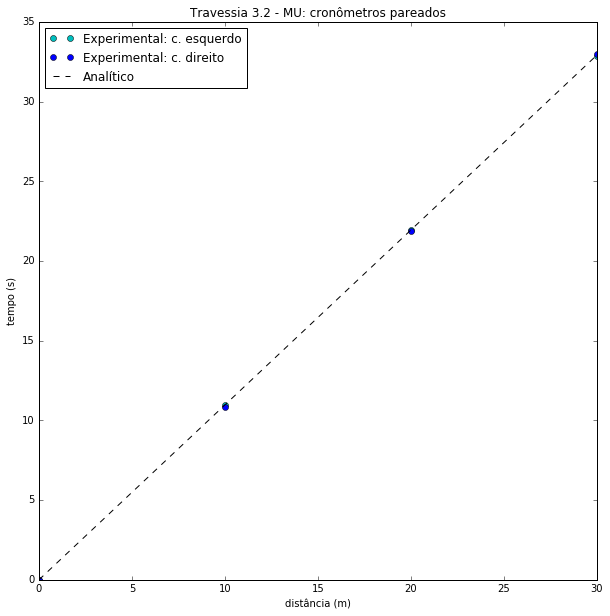

In [110]:
# Calculando analiticamente para a travessia 3.2
# Obtendo velocidade média a partir do tempo total (média dos 2 cronômetros) / espaço
v = 30 / ((t[3][3] + t[4][3]) / 2)
tAna = []
for x in p1:
    tAna.append(nextTmu(x, v))

plt.figure(figsize=(10,10))
plt.title("Travessia 3.2 - MU: cronômetros pareados")   
plt.xlabel('distância (m)')
plt.ylabel('tempo (s)')
plt.plot(p1, t[3], 'co', linestyle = "", label = "Experimental: c. esquerdo")
plt.plot(p1, t[4],'bo', linestyle = "", label = "Experimental: c. direito")
plt.plot(p1, tAna, 'k--', label = "Analítico")
plt.legend(loc = 0)

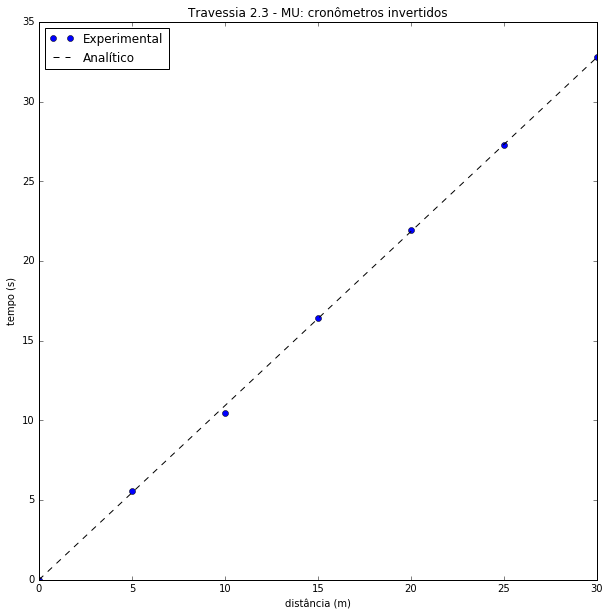

In [111]:
# Calculando analiticamente para a travessia 2.3
# Obtendo velocidade média a partir do tempo total (média dos 2 cronômetros) / espaço
v = 30 / t_seq[6]
tAna = []

for x in p2:
    tAna.append(nextTmu(x, v))

plt.figure(figsize=(10,10))
plt.title("Travessia 2.3 - MU: cronômetros invertidos")   
plt.xlabel('distância (m)')
plt.ylabel('tempo (s)')
plt.plot(p2, t_seq, 'bo', linestyle = "", label = "Experimental")
plt.plot(p2, tAna, 'k--', label = "Analítico")
plt.legend(loc = 0)

### Movimento Uniformemente Variado

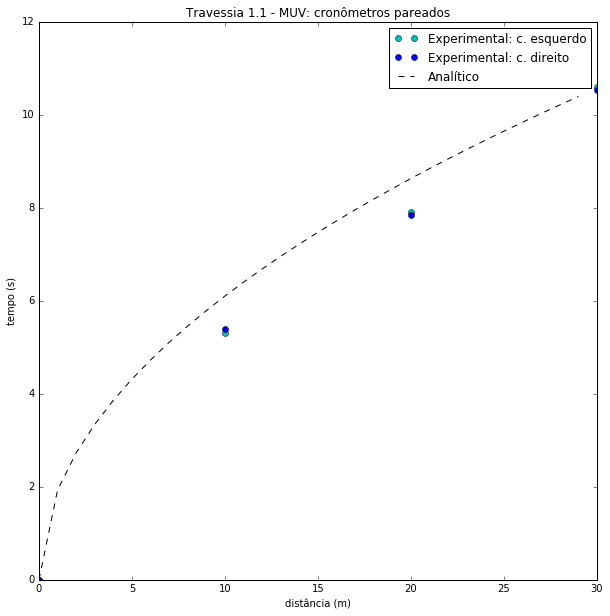

In [147]:
t = []

with open ("tempo/tempo-muv1.csv", "r") as mu1:
    rd = csv.reader(mu1, quoting=csv.QUOTE_NONNUMERIC)
    for line in rd:
        t.append([0] + line)
             
t_seq = (t[6][1:] + t[7])
t_seq.sort()

# Calculando analiticamente para a travessia 1.1
# Obtendo velocidade média a partir do tempo total (média dos 2 cronômetros) / espaço
a = 60 / (((t[0][3] + t[1][3]) / 2) * ((t[0][3] + t[1][3]) / 2) )
tAna = []
poriginal= []
toriginal= []
for x in range (0, 30):
    poriginal.append(x);
    tAna.append(nextTmuv(x, a))

plt.figure(figsize=(10,10))
plt.title("Travessia 1.1 - MUV: cronômetros pareados")   
plt.xlabel('distância (m)')
plt.ylabel('tempo (s)')
plt.plot(p1, t[0], 'co', linestyle = "", label = "Experimental: c. esquerdo")
plt.plot(p1, t[1],'bo', linestyle = "", label = "Experimental: c. direito")
plt.plot(poriginal, tAna, 'k--', label = "Analítico")
plt.legend(loc = 0)

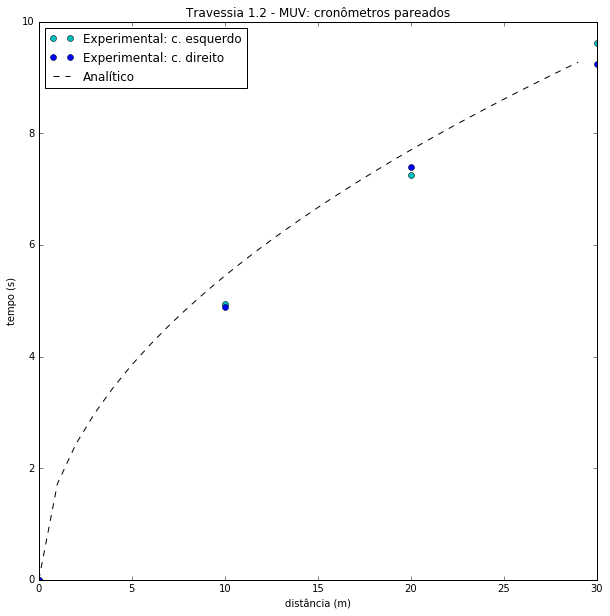

In [146]:
# Calculando analiticamente para a travessia 1.2
# Obtendo velocidade média a partir do tempo total (média dos 2 cronômetros) / espaço
a = 60 / (((t[3][3] + t[4][3]) / 2) * ((t[3][3] + t[4][3]) / 2) )
tAna = []
poriginal= []
toriginal= []
for x in range (0, 30):
    poriginal.append(x);
    tAna.append(nextTmuv(x, a))

plt.figure(figsize=(10,10))
plt.title("Travessia 1.2 - MUV: cronômetros pareados")   
plt.xlabel('distância (m)')
plt.ylabel('tempo (s)')
plt.plot(p1, t[3], 'co', linestyle = "", label = "Experimental: c. esquerdo")
plt.plot(p1, t[4],'bo', linestyle = "", label = "Experimental: c. direito")
plt.plot(poriginal, tAna, 'k--', label = "Analítico")
plt.legend(loc = 0)

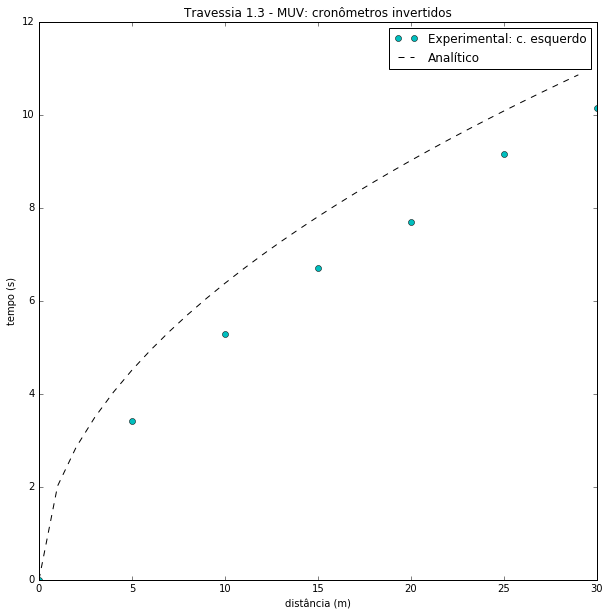

In [159]:
a = 60 / (((t[0][3] + t[1][3]) / 2) * ((t[0][3] + t[1][3]) / 2) )
tAna = []
poriginal= []
for x in range (0, 30):
    poriginal.append(x)
    tAna.append(nextTmuv(x, a))

plt.figure(figsize=(10,10))
plt.title("Travessia 1.3 - MUV: cronômetros invertidos")   
plt.xlabel('distância (m)')
plt.ylabel('tempo (s)')
plt.plot(p2, t_seq, 'co', linestyle = "", label = "Experimental: c. esquerdo")
plt.plot(poriginal, tAna, 'k--', label = "Analítico")
plt.legend(loc = 0)

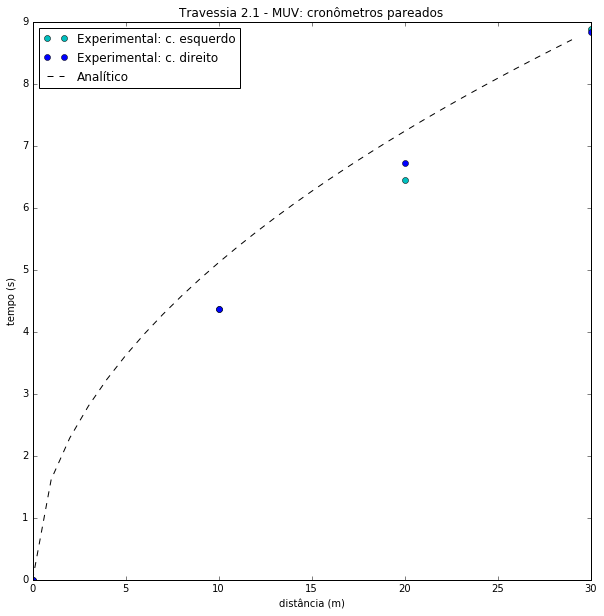

In [145]:
t = []
with open ("tempo/tempo-muv2.csv", "r") as mu1:
    rd = csv.reader(mu1, quoting=csv.QUOTE_NONNUMERIC)
    for line in rd:
        t.append([0] + line)
             
t_seq = (t[6][1:] + t[7])
t_seq.sort()

# Calculando analiticamente para a travessia 2.1
# Obtendo velocidade média a partir do tempo total (média dos 2 cronômetros) / espaço
a = 60 / (((t[0][3] + t[1][3]) / 2) * ((t[0][3] + t[1][3]) / 2) )
tAna = []
poriginal= []
toriginal= []
for x in range (0, 30):
    poriginal.append(x);
    tAna.append(nextTmuv(x, a))

plt.figure(figsize=(10,10))
plt.title("Travessia 2.1 - MUV: cronômetros pareados")   
plt.xlabel('distância (m)')
plt.ylabel('tempo (s)')
plt.plot(p1, t[0], 'co', linestyle = "", label = "Experimental: c. esquerdo")
plt.plot(p1, t[1],'bo', linestyle = "", label = "Experimental: c. direito")
plt.plot(poriginal, tAna, 'k--', label = "Analítico")
plt.legend(loc = 0)

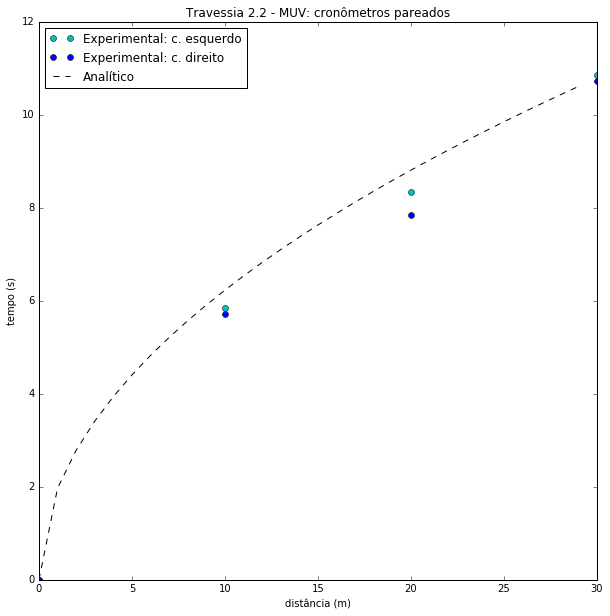

In [150]:
# Calculando analiticamente para a travessia 2.2
# Obtendo velocidade média a partir do tempo total (média dos 2 cronômetros) / espaço
a = 60 / (((t[3][3] + t[4][3]) / 2) * ((t[3][3] + t[4][3]) / 2) )
tAna = []
poriginal= []
toriginal= []
for x in range (0, 30):
    poriginal.append(x);
    tAna.append(nextTmuv(x, a))

plt.figure(figsize=(10,10))
plt.title("Travessia 2.2 - MUV: cronômetros pareados")   
plt.xlabel('distância (m)')
plt.ylabel('tempo (s)')
plt.plot(p1, t[3], 'co', linestyle = "", label = "Experimental: c. esquerdo")
plt.plot(p1, t[4],'bo', linestyle = "", label = "Experimental: c. direito")
plt.plot(poriginal, tAna, 'k--', label = "Analítico")
plt.legend(loc = 0)

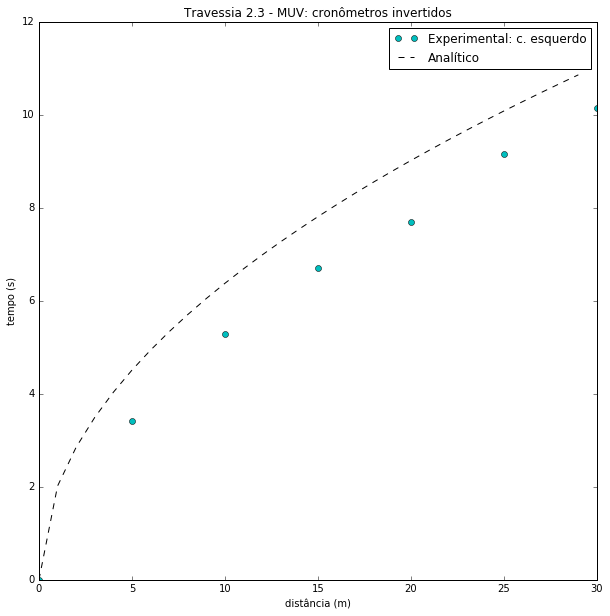

In [160]:
a = 60 / (((t[0][3] + t[1][3]) / 2) * ((t[0][3] + t[1][3]) / 2) )
tAna = []
poriginal= []
for x in range (0, 30):
    poriginal.append(x)
    tAna.append(nextTmuv(x, a))

plt.figure(figsize=(10,10))
plt.title("Travessia 2.3 - MUV: cronômetros invertidos")   
plt.xlabel('distância (m)')
plt.ylabel('tempo (s)')
plt.plot(p2, t_seq, 'co', linestyle = "", label = "Experimental: c. esquerdo")
plt.plot(poriginal, tAna, 'k--', label = "Analítico")
plt.legend(loc = 0)

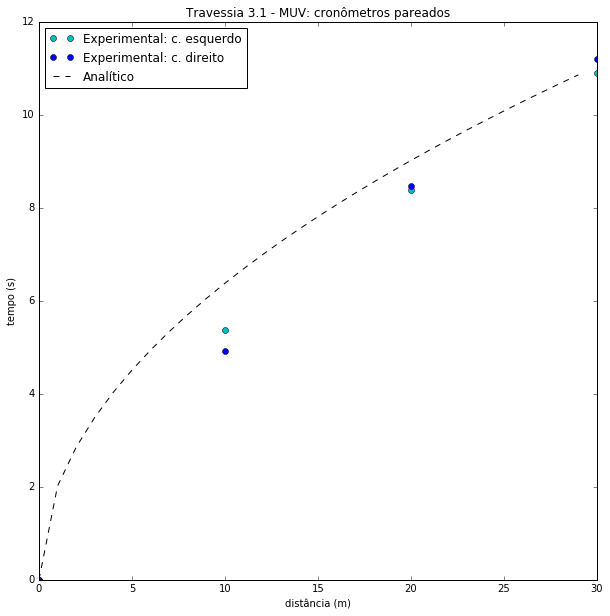

In [153]:
t = []
with open ("tempo/tempo-muv3.csv", "r") as mu1:
    rd = csv.reader(mu1, quoting=csv.QUOTE_NONNUMERIC)
    for line in rd:
        t.append([0] + line)
             
t_seq = (t[6][1:] + t[7])
t_seq.sort()

# Calculando analiticamente para a travessia 3.1
# Obtendo velocidade média a partir do tempo total (média dos 2 cronômetros) / espaço
a = 60 / (((t[0][3] + t[1][3]) / 2) * ((t[0][3] + t[1][3]) / 2) )
tAna = []
poriginal= []
toriginal= []
for x in range (0, 30):
    poriginal.append(x);
    tAna.append(nextTmuv(x, a))

plt.figure(figsize=(10,10))
plt.title("Travessia 3.1 - MUV: cronômetros pareados")   
plt.xlabel('distância (m)')
plt.ylabel('tempo (s)')
plt.plot(p1, t[0], 'co', linestyle = "", label = "Experimental: c. esquerdo")
plt.plot(p1, t[1],'bo', linestyle = "", label = "Experimental: c. direito")
plt.plot(poriginal, tAna, 'k--', label = "Analítico")
plt.legend(loc = 0)

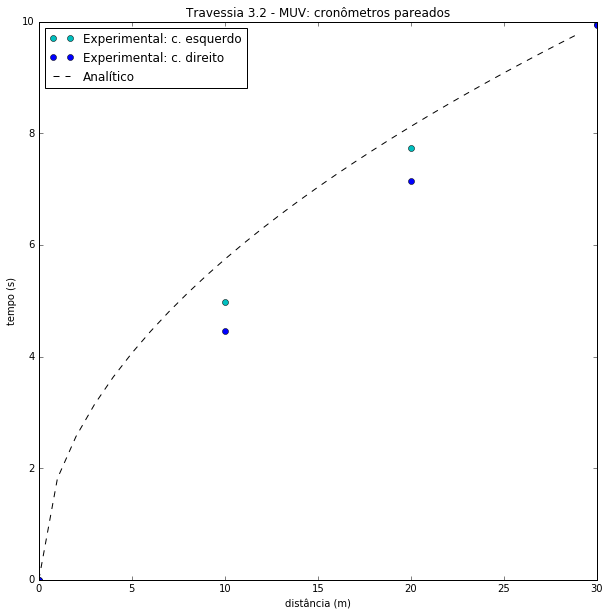

In [162]:
# Calculando analiticamente para a travessia 3.2
# Obtendo velocidade média a partir do tempo total (média dos 2 cronômetros) / espaço
a = 60 / (((t[3][3] + t[4][3]) / 2) * ((t[3][3] + t[4][3]) / 2) )
tAna = []
poriginal= []
toriginal= []
for x in range (0, 30):
    poriginal.append(x);
    tAna.append(nextTmuv(x, a))

plt.figure(figsize=(10,10))
plt.title("Travessia 3.2 - MUV: cronômetros pareados")   
plt.xlabel('distância (m)')
plt.ylabel('tempo (s)')
plt.plot(p1, t[3], 'co', linestyle = "", label = "Experimental: c. esquerdo")
plt.plot(p1, t[4],'bo', linestyle = "", label = "Experimental: c. direito")
plt.plot(poriginal, tAna, 'k--', label = "Analítico")
plt.legend(loc = 0)

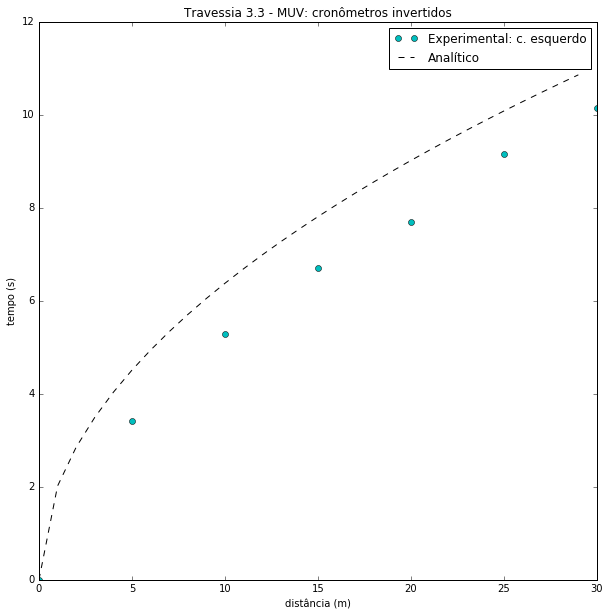

In [158]:
a = 60 / (((t[0][3] + t[1][3]) / 2) * ((t[0][3] + t[1][3]) / 2) )
tAna = []
poriginal= []
for x in range (0, 30):
    poriginal.append(x)
    tAna.append(nextTmuv(x, a))

plt.figure(figsize=(10,10))
plt.title("Travessia 3.3 - MUV: cronômetros invertidos")   
plt.xlabel('distância (m)')
plt.ylabel('tempo (s)')
plt.plot(p2, t_seq, 'co', linestyle = "", label = "Experimental: c. esquerdo")
plt.plot(poriginal, tAna, 'k--', label = "Analítico")
plt.legend(loc = 0)

## Análise

Observando graficamente os dados obtidos de maneira experimental _versus_ os dados obtidos analiticamente, por meio dos modelos da física newtoniana, observamos que o modelo é adequado para os dados, para o nível de detalhamento desejado. Os erros obtidos foram pequenos, e se devem, principalmente, a erros humanos, como o controle da velocidade da passada, de seu espaçamento, e do tempo de reação dos operadores de cronômetro. Há ainda os erros devidos à qualidade do material envolvido no experimento e das características do mundo físico, não ideal: a inclinação não uniforme da rampa no MUV, a resistência do ar, entre outras. 

## Análise crítica

_Summarize the important physical concepts for which you gained a better understanding
and discuss the numerical or computer techniques you learned. Make specific
comments on the assignment and suggestions for improvements or alternatives._

_Comentando pontos positivos, negativos, dificuldades e limitações dos experimentos e dos modelos matematicos
implementados. Os modelos matematicos sao uma boa  simulacao da realidade? Por que?_

## Log

Foi gasta aproximadamente uma hora para o preparo e realização do experimento de MU e uma hora e meia para o de MUV.

O relatório, a programação e a análise dos dados tomou cerca de 2 horas e meia, com dois autores atuando em paralelo, e a edição do vídeo, 1 hora.

## Contribuição dos autores

Todos os autores operaram cronômetros no experimento de Movimento Uniforme, e Guilherme e Nathan no experimento de Movimento Uniformemente Variado. Bruna, Eduardo e Guilherme operaram a câmera e realizaram a travessia durante o experimento de MU, em revezamento. 

Além disso, contamos com a contribuição voluntária de Gabriel Russo, Germano Hüning Neuenfeld e Victor Raposo para operar os cronômetros no experimento de Movimento Uniforme; de Victor Batistella e Bruno Carneiro para realizar a travessa no experimento de MUV e de Pedro Paulo, Daniel Martinez e Lucas Moretto para operar a câmera e cronômetros durante o mesmo.

Bruna e Eduardo redigiram e programaram o relatório e Erica editou o vídeo.

Todos os autores leram e aprovaram a versão final deste relatório.

## Vídeo dos experimentos

[Link para o vídeo no YouTube](https://www.youtube.com/watch?v=ekFRp_ukFtw&feature=youtu.be)